In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [3]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})





In [5]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [7]:
df = pd.get_dummies(df, columns=['furnishingstatus'])

In [8]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [14]:
X=df.drop('price' ,axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

MAE: 970043.4039201641
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


In [17]:
# Coefficients and intercept
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coef_df)
print(f'Intercept: {lr.intercept_}')

                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11       furnishingstatus_furnished  1.801756e+05
12  furnishingstatus_semi-furnished  5.329381e+04
13     furnishingstatus_unfurnished -2.334694e+05
Intercept: 79856.73100297339


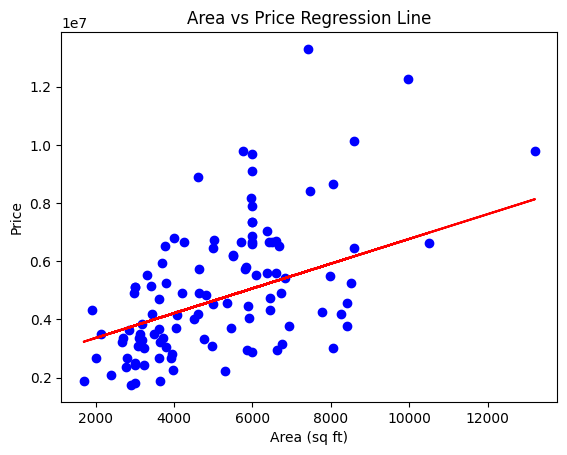

In [18]:
# Simple Linear Regression with Area
X_area = df[['area']]
y_price = df['price']

X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_price, test_size=0.2, random_state=42)

lr_area = LinearRegression()
lr_area.fit(X_train_area, y_train_area)

# Predict
y_pred_area = lr_area.predict(X_test_area)

# Plot
plt.scatter(X_test_area, y_test_area, color='blue')
plt.plot(X_test_area, y_pred_area, color='red')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Area vs Price Regression Line')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
        'mainroad', 'guestroom', 'basement',
        'hotwaterheating', 'airconditioning', 'prefarea']]

y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))


coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


MAE: 979112.216218738
MSE: 1800793719718.967
R² Score: 0.6437296086614117
            Feature   Coefficient
0              area  2.377105e+02
1          bedrooms  7.848365e+04
2         bathrooms  1.109326e+06
3           stories  4.269096e+05
4           parking  2.474431e+05
5          mainroad  4.126778e+05
6         guestroom  2.436064e+05
7          basement  4.350055e+05
8   hotwaterheating  7.122647e+05
9   airconditioning  8.084154e+05
10         prefarea  6.367877e+05


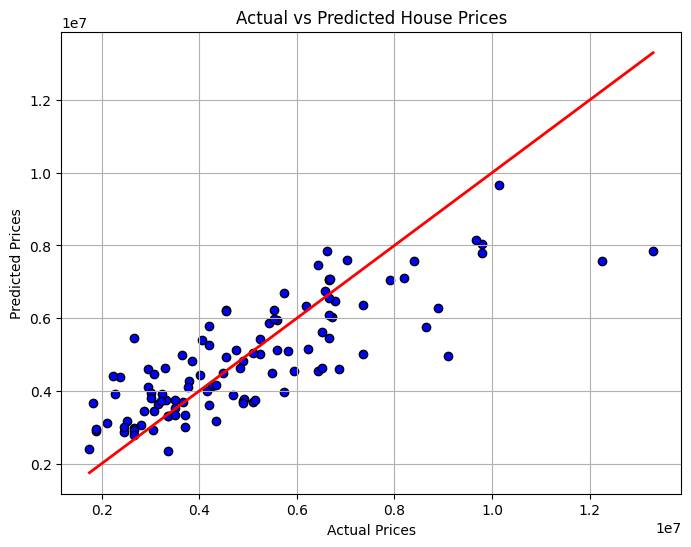

In [10]:
import matplotlib.pyplot as plt

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
